In [1]:
# !ls

In [1]:
import pandas as pd
import numpy as np

In [2]:
dayData = pd.read_csv("day.csv")

In [7]:
dayData.shape

(731, 16)

In [3]:
hourData = pd.read_csv("hour.csv")

In [4]:
dayData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hourData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hourData.shape

(17379, 17)

In [9]:
hourData.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

-Looking how quantitative data impacting the target variable

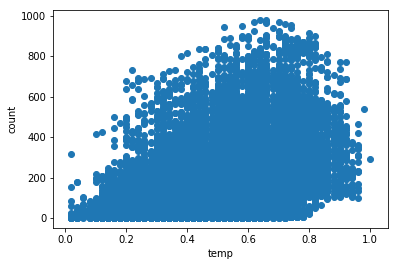

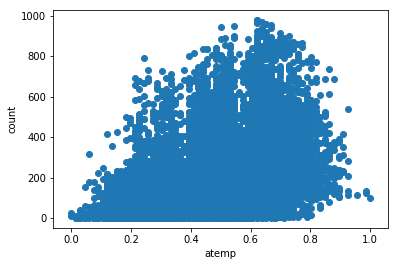

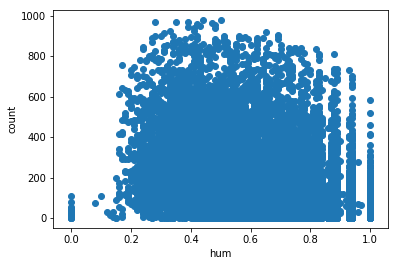

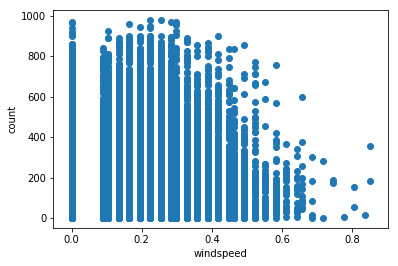

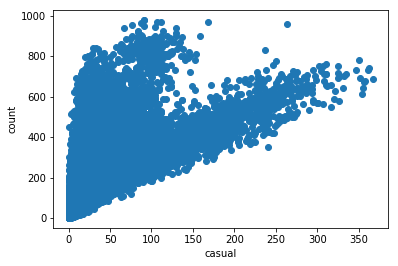

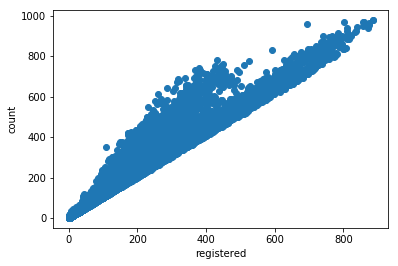

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in ["temp","atemp","hum","windspeed","casual","registered"]:
    plt.scatter(hourData[i],hourData.cnt)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    

In [11]:
hourData.corr(method="pearson")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [50]:
# dayData.describe()

In [51]:
# hourData.describe()

In [52]:
hourData.dtypes
hourData['cnt'].shape
# test_X.shape

(17379,)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
train_X,test_X,train_Y,test_Y =  train_test_split(hourData[['temp','atemp','hum','windspeed','casual','registered']],hourData['cnt'],test_size=0.33,random_state=42)

In [30]:
model_1 = LinearRegression()
model_1.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h2>Train accuracy</h2>

In [32]:
pred_train=model_1.predict(train_X)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score


In [43]:
mse_train  = mean_squared_error(train_Y,pred_train)
mse_train

9.200825337630085e-26

In [44]:
r_train = r2_score(train_Y,pred_train)

In [45]:
r_train

1.0

In [46]:
pred_test = model_1.predict(test_X)

In [47]:
mse_test = mean_squared_error(test_Y,pred_test)
mse_test

9.246196626050938e-26

In [48]:
r_test = r2_score(test_Y,pred_test)

In [49]:
r_test

1.0